# Exercise 1

In [12]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
keras = tf.keras
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('./bodyfat.csv')
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


## Preprocessing

In [14]:
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [16]:
df.duplicated().any()

False

In [17]:
X = df.drop(['BodyFat'], axis=1)
y = df.BodyFat

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [19]:
xtensor = tf.convert_to_tensor(X_train)
xtensor.shape

TensorShape([201, 14])

In [20]:
model = Sequential([
    Input(shape=(14,)),
    Dense(128,  activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear'),
])

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['accuracy'])

In [22]:
epochs = 100
batch_size = 32
obj = model.fit(tf.convert_to_tensor(X_train), tf.convert_to_tensor(y_train), epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/100
6/6 [==============================] - 2s 56ms/step - loss: 811135.7500 - accuracy: 0.0000e+00 - val_loss: 571.4833 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 255.7015 - accuracy: 0.0000e+00 - val_loss: 91.5650 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 77.0834 - accuracy: 0.0000e+00 - val_loss: 103.1584 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 73.5480 - accuracy: 0.0000e+00 - val_loss: 97.5586 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 94.3255 - accuracy: 0.0000e+00 - val_loss: 35.7235 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 88.9308 - accuracy: 0.0000e+00 - val_loss: 74.8052 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 59ms/step - loss: 71.8117 - accuracy: 0

In [23]:
loss, acc = model.evaluate(tf.convert_to_tensor(X_test), tf.convert_to_tensor(y_test))
loss, acc

2/2 [==============================] - 0s 7ms/step - loss: 41.7647 - accuracy: 0.0000e+00


(41.764705657958984, 0.0)

In [24]:
rmse = np.sqrt(obj.history['loss'])
rmse

array([900.6307512 ,  15.99067035,   8.77971769,   8.57601375,
         9.71213201,   9.43031209,   8.47418106,   7.3876715 ,
         6.93437193,   7.25058297,   6.69601383,   6.71494487,
         7.36166107,   7.40481412,   6.18324272,   6.43292222,
         6.64821057,   7.54722427,   7.64757909,   6.7411987 ,
         6.18279635,   5.66450025,   5.87190782,   6.17417073,
         5.79589572,   5.91192193,   5.67255324,   5.77316494,
         6.91260302,   6.29576688,   6.71313725,   6.46660309,
         6.51262202,   5.94815681,   5.19984676,   5.43386684,
         5.334771  ,   5.91284619,   5.27680557,   5.31137037,
         6.47564978,   5.90247947,   5.23910864,   5.27804287,
         5.32885522,   6.16938148,   6.55632906,   5.42071187,
         5.52268862,   5.06324424,   5.22291846,   5.34288062,
         5.46286584,   6.8404943 ,   7.7520166 ,   8.56231066,
         8.85865934,   6.4236568 ,   7.65471226,   7.33441894,
         7.07911146,   6.60642185,   6.65100206,   5.86

## Performance tabulation

In [25]:
pd.DataFrame({"epochs": range(1, epochs + 1), "rmse": rmse})

,epochs,rmse
0,1,900.630751
1,2,15.990670
2,3,8.779718
3,4,8.576014
4,5,9.712132
...,...,...
95,96,4.624553
96,97,4.726971
97,98,4.940241
98,99,5.080029


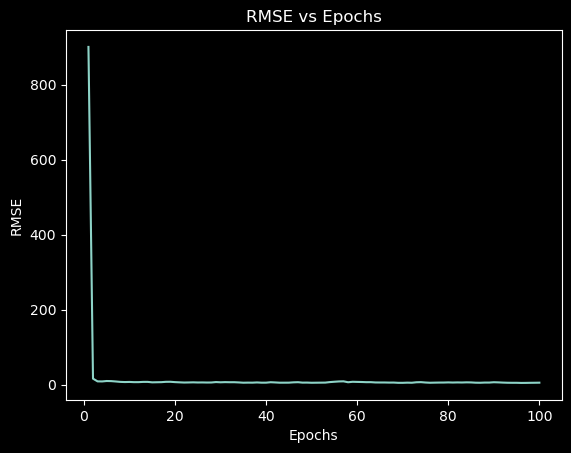

In [28]:
# For all losses
fig = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("RMSE vs Epochs")
plt.plot(range(1, epochs + 1), rmse)

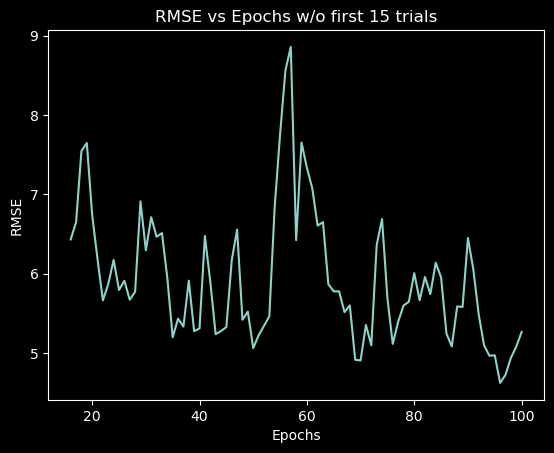

In [29]:
# Removing 1st 15 losses for better representation of fluctuating loss
fig = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("RMSE vs Epochs w/o first 15 trials")
plt.plot(range(16, epochs + 1), rmse[15:])